In [ ]:
#Check the Current Environment in Jupyter
import sys
print(sys.executable)

/opt/anaconda3/envs/py_project/bin/python


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.decomposition import PCA #golden standard machine learning library!!!!
import scipy.stats as sps
from scipy.spatial.distance import pdist, squareform
import pickle
# this is for hierarchical clustering
import scipy.spatial
import scipy.cluster

In [6]:
#remove unwanted rows in the original table
data = pd.read_excel('additional_file1.xlsx',skiprows=[0,1,2,3,5,6])
print(data.columns) # get the column names I have

data.head()

Index(['Unnamed: 0', 'CD1_4', 'CD1_6', 'CD2_4', 'CD2_6', 'CD3_4', 'CD3_6',
       'CD4_4', 'CD4_6', 'CD5_4', 'CD5_6', 'CD6_4', 'CD6_6', 'CD7_4', 'CD7_6',
       'CD8_4', 'CD8_6', 'CD9_4', 'CD9_6', 'CD10_6', 'C1_4', 'C1_6', 'C2_4',
       'C2_6', 'C3_4', 'C3_6', 'C4_4', 'C4_6', 'C5_4', 'C5_6', 'C6_4', 'C6_6',
       'C7_4', 'C7_6', 'C8_4', 'C8_6', 'C9_4', 'C9_6', 'C10_6', 'No. of Seqs',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'],
      dtype='object')


,Unnamed: 0,CD1_4,CD1_6,CD2_4,CD2_6,CD3_4,CD3_6,CD4_4,CD4_6,CD5_4,...,C10_6,No. of Seqs,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,Otu0001,3.669385,39.214233,0.037064,0.000000,0.000000,0.000000,5.003706,0.037064,27.650111,...,8.710156,25195,Bifidobacterium longum,Bifidobacterium(100),Bifidobacterium(100),Bifidobacteriaceae(100),Bifidobacteriales(100),Actinobacteria(100),Actinobacteria(100),M00642_0_000000000-A53KY_1_1101_12124_2997
1,Otu0002,12.601927,4.929577,0.889548,0.778354,2.075612,0.778354,15.344700,27.427724,1.742031,...,16.901408,15375,Escherichia/Enterobacter/Shigella spp.,Escherichia/Shigella(78),Escherichia/Shigella(95),Enterobacteriaceae(100),Enterobacteriales(100),Gammaproteobacteria(100),Proteobacteria(100),M00642_0_000000000-A53KY_1_1110_12118_6435
2,Otu0003,0.000000,0.000000,72.424018,64.047443,72.683469,2.409192,0.000000,0.037064,0.000000,...,0.037064,13421,Bifidobacterium pseudocatenulatum,Bifidobacterium(100),Bifidobacterium(100),Bifidobacteriaceae(100),Bifidobacteriales(100),Actinobacteria(100),Actinobacteria(100),M00642_12024_000000000-A6VV0_1_1104_25272_24319
3,Otu0004,0.000000,0.037064,0.000000,0.000000,0.000000,0.815419,7.338769,0.000000,3.780578,...,0.000000,7118,Bifidobacterium breve,Bifidobacterium(100),Bifidobacterium(100),Bifidobacteriaceae(100),Bifidobacteriales(100),Actinobacteria(100),Actinobacteria(100),M00642_0_000000000-A53KY_1_1107_13406_17496
4,Otu0005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.155671,0.741290,0.481838,...,0.000000,3181,Bifidobacterium bifidum,Bifidobacterium(100),Bifidobacterium(100),Bifidobacteriaceae(100),Bifidobacteriales(100),Actinobacteria(100),Actinobacteria(100),M00642_0_000000000-A53KY_1_1101_9491_4015


In [7]:
df_raw = pd.DataFrame(data)
abun_matrix_df = df_raw[:-1].copy().rename(columns ={"Unnamed: 0":"OTU","Unnamed: 43":"Family"} ).drop(df_raw.columns[[-9,-8,-7,-6,-4,-3,-2,-1]], axis=1)
abun_matrix_df.shape
abun_matrix_df.head()


,OTU,CD1_4,CD1_6,CD2_4,CD2_6,CD3_4,CD3_6,CD4_4,CD4_6,CD5_4,...,C6_4,C6_6,C7_4,C7_6,C8_4,C8_6,C9_4,C9_6,C10_6,Family
0,Otu0001,3.669385,39.214233,0.037064,0.000000,0.000000,0.000000,5.003706,0.037064,27.650111,...,6.856931,0.111193,38.843588,29.021497,0.000000,0.852483,52.409192,18.754633,8.710156,Bifidobacteriaceae(100)
1,Otu0002,12.601927,4.929577,0.889548,0.778354,2.075612,0.778354,15.344700,27.427724,1.742031,...,11.489993,47.294292,0.037064,4.633062,63.491475,23.424759,32.802076,1.111935,16.901408,Enterobacteriaceae(100)
2,Otu0003,0.000000,0.000000,72.424018,64.047443,72.683469,2.409192,0.000000,0.037064,0.000000,...,55.522609,0.000000,0.000000,0.037064,0.000000,0.000000,0.000000,61.564122,0.037064,Bifidobacteriaceae(100)
3,Otu0004,0.000000,0.037064,0.000000,0.000000,0.000000,0.815419,7.338769,0.000000,3.780578,...,7.190511,0.000000,0.000000,0.000000,0.037064,0.111193,0.000000,0.000000,0.000000,Bifidobacteriaceae(100)
4,Otu0005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.155671,0.741290,0.481838,...,0.889548,0.037064,31.097109,32.283173,0.000000,0.259451,0.000000,0.000000,0.000000,Bifidobacteriaceae(100)


In [8]:
#Create taxa table (Not used)

family_taxa = abun_matrix_df[["Family","OTU"]].copy()
family_taxa.tail()
#family_taxa=get_taxa_columns(abun_matrix,'Genus')
#family_taxa["Family"].unique()
family_taxa['Family']

0         Bifidobacteriaceae(100)
1         Enterobacteriaceae(100)
2         Bifidobacteriaceae(100)
3         Bifidobacteriaceae(100)
4         Bifidobacteriaceae(100)
                  ...            
369           Bacteroidaceae(100)
370    Peptostreptococcaceae(100)
371         Xanthomonadaceae(100)
372          Lachnospiraceae(100)
373    Peptostreptococcaceae(100)
Name: Family, Length: 374, dtype: object

In [9]:
#Create sample data

# Extracts all columns that represent samples (without column "OTU" and "Family")
sample_cols= list(abun_matrix_df.columns[1:-1])
#sample_cols

# Create sample dataframe
sample_df=pd.DataFrame({'Sample':sample_cols})
sample_df.tail()

,Sample
33,C8_4
34,C8_6
35,C9_4
36,C9_6
37,C10_6


In [10]:
#Create a function the filter those OTUs that have more reads (pass the threshold), and groups the rest of OTUs that read less into a new row "Other"
def create_other_group(df,thresh):
    '''From a given threshold or cut-off point it creates an "Other" row with the summed abundance of 
    species below the givedn threshold. Used to give idea of remainder of species excluded from plot legend'''
    index_to_append = len(abun_matrix_df)
    abun_matrix_df.at[index_to_append,'OTU']= 'Other'
    cols= abun_matrix_df.columns 
    for col in cols:
        if col=='OTU' or col=='Family':
            pass
        else:
            ls=[]
            for i in range(374):
                abund_num = abun_matrix_df.loc[abun_matrix_df.index[i],col]
                if abund_num < thresh:
                    ls.append(abund_num)
            other_sum = sum(ls)
            abun_matrix_df.loc[abun_matrix_df['OTU']=='Other', col]= np.sum(ls)
    sample_cols = list(abun_matrix_df.columns[1:-1])
    ids=abun_matrix_df['OTU'].to_list()
    df_thresh_removed = abun_matrix_df[sample_cols].apply(lambda x: np.where(x <= thresh,0,x))
    df_thresh_removed['OTU']=ids
    df=df_thresh_removed[(df_thresh_removed.iloc[:,0:-1] > 0).any(axis=1)]
    df.reset_index(drop=True,inplace=True)
    return df

abund_matrix_other = create_other_group(abun_matrix_df,2.8)
abund_matrix_other.tail()


,CD1_4,CD1_6,CD2_4,CD2_6,CD3_4,CD3_6,CD4_4,CD4_6,CD5_4,CD5_6,...,C6_4,C6_6,C7_4,C7_6,C8_4,C8_6,C9_4,C9_6,C10_6,OTU
47,0.000000,4.410675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0066
48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0068
49,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0073
50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0075
51,9.896219,10.600445,13.417346,11.341735,3.558191,16.493699,9.970348,15.900667,19.273536,7.820608,...,5.633803,13.936249,0.0,6.412157,0.0,15.381764,3.484062,13.565604,8.524833,Other


In [47]:
#build a update DataFrame with "Other" and have "Family" column that match to each OTU

taxa = abund_matrix_other["OTU"]
data_to_append = []
for i in range(len(taxa)):
    for j in range(len(family_taxa["OTU"])-1):
        if taxa[i] == family_taxa["OTU"][j]:
            data_to_append.append({'Family': family_taxa['Family'][j]})

data_to_append.append({'Family': 'Other'})
taxa_df = pd.DataFrame(data_to_append)       
#taxa_df

# Remove parentheses in original sting in Family column
taxa_df = taxa_df.replace("100","", regex=True)
taxa_df = taxa_df['Family'].str.replace(r'[()]',"", regex=True)
taxa_df = pd.DataFrame(taxa_df)
result = abund_matrix_other.join(taxa_df["Family"])
result.tail()

#abun_matrix_df.tail()

,CD1_4,CD1_6,CD2_4,CD2_6,CD3_4,CD3_6,CD4_4,CD4_6,CD5_4,CD5_6,...,C6_6,C7_4,C7_6,C8_4,C8_6,C9_4,C9_6,C10_6,OTU,Family
47,0.000000,4.410675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0066,Lachnospiraceae
48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0068,Streptococcaceae
49,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0073,Propionibacteriaceae
50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,Otu0075,Veillonellaceae
51,9.896219,10.600445,13.417346,11.341735,3.558191,16.493699,9.970348,15.900667,19.273536,7.820608,...,13.936249,0.0,6.412157,0.0,15.381764,3.484062,13.565604,8.524833,Other,Other


In [48]:
#Group the same family together , and sum each of the family
result =result.groupby(["Family"]).sum().rename_axis(columns = 'sample')
column_headers = list(result.columns.values)
result_nootu = result.drop("OTU", axis=1)
result_nootu


sample,CD1_4,CD1_6,CD2_4,CD2_6,CD3_4,CD3_6,CD4_4,CD4_6,CD5_4,CD5_6,...,C5_6,C6_4,C6_6,C7_4,C7_6,C8_4,C8_6,C9_4,C9_6,C10_6
Family,,,,,,,,,,,,,,,,,,,,,
Bacteroidaceae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.081542,0.000000,6.115641,0.000000
Bifidobacteriaceae,3.669385,44.440326,72.424018,64.047443,72.683469,0.000000,54.336546,22.905856,61.527057,77.279466,...,63.343217,69.570052,0.000000,69.940697,64.121572,27.057079,34.507042,52.409192,80.318755,27.835434
Clostridiaceae_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.197924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Coriobacteriaceae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,13.306153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Enterobacteriaceae,12.601927,4.929577,0.000000,0.000000,0.000000,0.000000,15.344700,34.581171,0.000000,0.000000,...,20.570793,11.489993,47.294292,13.602669,4.633062,67.012602,23.424759,32.802076,0.000000,16.901408
Enterococcaceae,13.046701,0.000000,0.000000,0.000000,0.000000,0.000000,5.893254,0.000000,7.412898,11.823573,...,0.000000,0.000000,5.485545,0.000000,0.000000,0.000000,3.150482,0.000000,0.000000,0.000000
Erysipelotrichaceae,0.000000,0.000000,0.000000,5.040771,0.000000,2.891030,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.389177
Lachnospiraceae,57.709414,30.726464,5.559674,10.155671,19.940697,57.079318,0.000000,9.414381,0.000000,0.000000,...,0.000000,0.000000,12.824314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.349148
Lactobacillaceae,0.000000,0.000000,0.000000,0.000000,3.817643,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
#Transpose the datafrmae so we can plot the stacked barplot
result_T=result_nootu.T
result_T.index
result_T.head()


Family,Bacteroidaceae,Bifidobacteriaceae,Clostridiaceae_1,Coriobacteriaceae,Enterobacteriaceae,Enterococcaceae,Erysipelotrichaceae,Lachnospiraceae,Lactobacillaceae,Other,Pasteurellaceae,Peptostreptococcaceae,Porphyromonadaceae,Propionibacteriaceae,Streptococcaceae,Veillonellaceae,unclassified
sample,,,,,,,,,,,,,,,,,
CD1_4,0.0,3.669385,0.0,0.0,12.601927,13.046701,0.000000,57.709414,0.000000,9.896219,0.0,0.0,0.0,0.0,0.000000,0.000000,3.076353
CD1_6,0.0,44.440326,0.0,0.0,4.929577,0.000000,0.000000,30.726464,0.000000,10.600445,0.0,0.0,0.0,0.0,4.077094,5.226093,0.000000
CD2_4,0.0,72.424018,0.0,0.0,0.000000,0.000000,0.000000,5.559674,0.000000,13.417346,0.0,0.0,0.0,0.0,0.000000,0.000000,8.598962
CD2_6,0.0,64.047443,0.0,0.0,0.000000,0.000000,5.040771,10.155671,0.000000,11.341735,0.0,0.0,0.0,0.0,0.000000,4.373610,5.040771
CD3_4,0.0,72.683469,0.0,0.0,0.000000,0.000000,0.000000,19.940697,3.817643,3.558191,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [51]:

# Transpose and Adjust the DataFrame that could be used to do hierarchical clustering
abund_matrix_other_T = abund_matrix_other.T
abund_matrix_other_T = abund_matrix_other_T.rename(columns = abund_matrix_other_T.iloc[-1]).drop(abund_matrix_other_T.index[-1])

#convert dataframe object to float #so we can use to plot fig
abund_matrix_other_T_float= abund_matrix_other_T.apply(pd.to_numeric)
abund_matrix_other_T

# store the sample names as list
sample_names= abund_matrix_other_T.index.tolist()



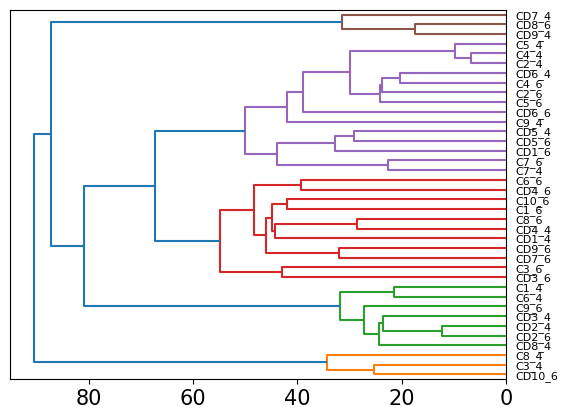

In [52]:
# Use hierarchical clustering to see the relationship between sample
cl = scipy.cluster.hierarchy.linkage(abund_matrix_other_T, method='average', optimal_ordering=True)
dataf = pd.DataFrame(cl)
cl

# show the clustering


#plt.figure(figsize=(3,7))
hierarchy = scipy.cluster.hierarchy.dendrogram(cl, labels= sample_names, truncate_mode='none',orientation='left')
#sns.clustermap(cl,row_cluster=True, col_cluster= False)




/var/folders/93/48h6fsl52jn0_4kn358w2gnm0000gn/T/ipykernel_968/2619098450.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 17)  # 'tab20' colormap with 17 distinct colors


Text(0.5, 0, 'Percentage(%)')

<Figure size 640x480 with 0 Axes>

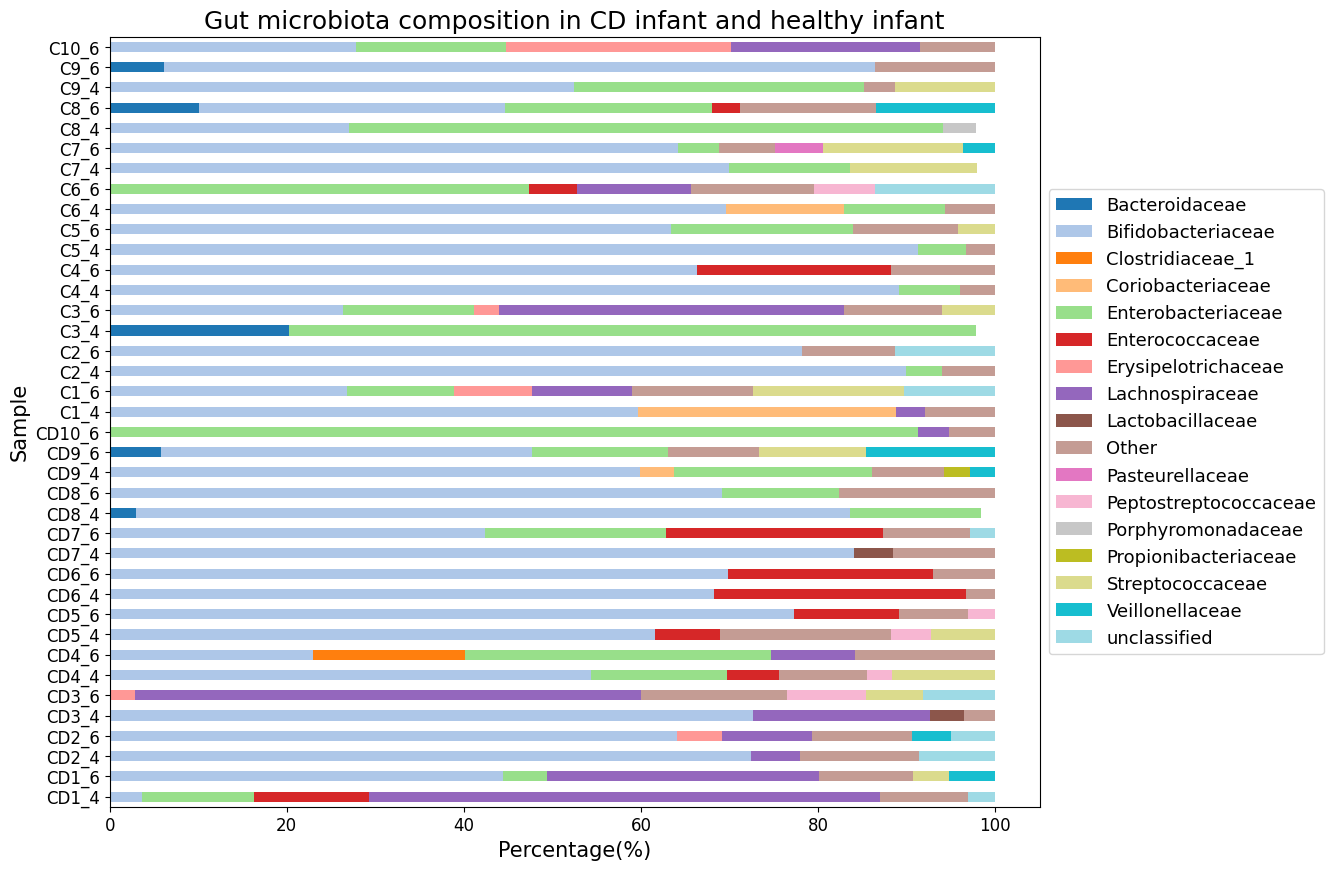

In [60]:
#Plot the stacked barplot that represent the composition of gut microbiota in infants
# Define the colormap
cmap = plt.cm.get_cmap('tab20', 17)  # 'tab20' colormap with 17 distinct colors

plt.figure()
plt.rcParams.update({'font.size': 15})
result_T.plot(figsize=(12, 10), kind='barh', stacked=True, mark_right=True, fontsize=12,
              title='Gut microbiota composition in CD infant and healthy infant',
              color=[cmap(i) for i in range(cmap.N)])  # Use colors from the colormap

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.ylabel('Sample', fontdict={'fontsize': 15})
plt.xlabel('Percentage(%)', fontdict={'fontsize': 15})